<a href="https://colab.research.google.com/github/dantae74/machine-learning/blob/main/12-04-rnn-stock-prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

모두를 위한 머신러닝에서 가져왔습니다.
# stock prediction

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [3]:
# train Parameters
seq_length = 7
data_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500

In [4]:
# Open, High, Low, Volume, Close
url = 'https://raw.githubusercontent.com/hunkim/DeepLearningZeroToAll/master/data-02-stock_daily.csv'
xy = np.loadtxt(url, delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)

In [5]:
xy.shape

(732, 5)

In [6]:
# train/test split
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]  # Index from [train_size - seq_length] to utilize past sequence

In [7]:
# Scale each
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [8]:
# build datasets
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i + seq_length, :]
        y = time_series[i + seq_length, [-1]]  # Next close price
#        print(x, "->", y)
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [9]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

In [10]:
tf.model = tf.keras.Sequential();
tf.model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, data_dim)))
tf.model.add(tf.keras.layers.Dense(units=output_dim, activation='tanh'))
tf.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 28        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [11]:
tf.model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr=learning_rate))
tf.model.fit(trainX, trainY, epochs=iterations, verbose=0)


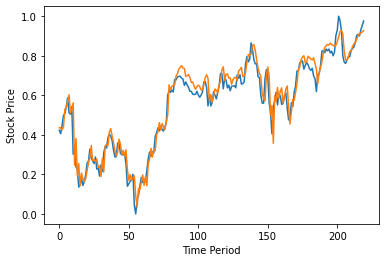

In [12]:
# Test step
test_predict = tf.model.predict(testX)

# Plot predictions
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()